In [ ]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.9 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline
from diffusers.utils import load_image
import torch
from torch import autocast
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    torch_dtype=torch.float16, variant="fp16",
    use_safetensors=True
)
pipe = pipe.to("cuda")



Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

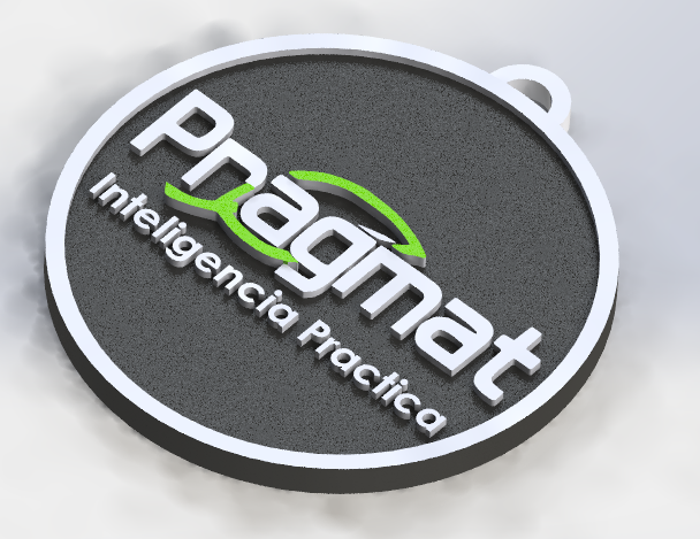

In [ ]:
import requests
from io import BytesIO
from PIL import Image

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_img = Image.open("/content/Captura de pantalla 2023-08-12 142056.png")
width, height = init_img.size
new_width = 700
aspect_ratio = height / width
new_height = int(aspect_ratio * new_width)
init_img = init_img.resize((new_width, new_height))
init_img = init_img.convert("RGB")
#init_img = Image.open(BytesIO(response.content)).convert("RGB")
#init_img = init_img.resize((768, 512))
init_img

In [ ]:

prompt = "vectorized key chain, illustration, text, 3d printed"
prompt_logo = "Logo for a condor company,blue-green,a condor, come to life,symmetrical,wild nature,illustration,vector art,logo design, text"
prompt2 = "logo, sleek design suitable for 3D printing. Use the brand colors orange #FF6600 and gray #999999. The logo should have clean lines, smoothed edges, and flat surfaces suitable for 3D printing. Apply a futuristic, technological feel. Make it in a professional high-resolution style."

  0%|          | 0/37 [00:00<?, ?it/s]

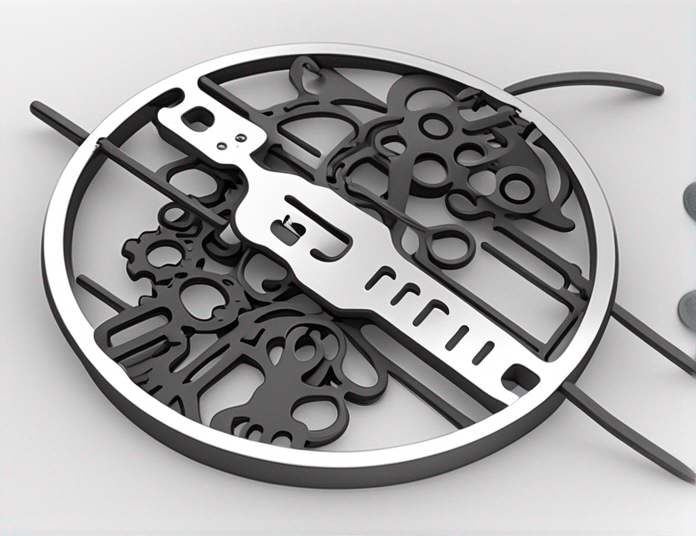

In [ ]:
import random
import sys

seed = random.randint(0, sys.maxsize)



image = pipe(prompt=prompt,
                 image=init_img,
                 strength=0.75,
                 guidance_scale=7.5,
                 generator = torch.Generator("cuda").manual_seed(seed)).images[0]
image

In [ ]:
https://www.upscale.media/upload